In [2]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder



In [3]:
label_encoder = LabelEncoder()


In [4]:
centers=pd.read_csv('DATA/fulfilment_center_info.csv')
meals=pd.read_csv('DATA/meal_info.csv')
df=pd.read_csv('DATA/train.csv')

In [5]:
df=df.merge(centers,on='center_id', sort=False)
df=df.merge(meals,on='meal_id', sort=False)
df = df.sort_values(by=['week'])

In [6]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
213354,1129793,1,93,1971,261.96,289.06,1,0,528,461,34,TYPE_A,3.9,Sandwich,Italian
52285,1160002,1,83,1248,152.29,240.62,0,0,107,659,77,TYPE_A,5.3,Beverages,Indian
58666,1132348,1,67,1248,251.23,253.23,0,0,26,638,56,TYPE_B,7.0,Beverages,Indian
226680,1420300,1,17,1902,387.03,446.23,0,0,55,517,56,TYPE_A,3.2,Biryani,Indian
256134,1347563,1,139,2581,584.91,613.07,1,1,149,693,34,TYPE_C,2.8,Pizza,Continental


In [23]:
diff=df.copy()


In [36]:
diff['discount']=diff['base_price']-diff['checkout_price']
diff['discount_perc']=(100*diff['discount'])/diff['base_price']
diff['discount_perc']=diff['discount_perc'].astype('int')
diff['profit_change']=-1*diff['discount_perc']

In [37]:
diff.describe(percentiles=[0.05,0.10,0.90,0.95])

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount_perc,discount,profit_change
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,5.596369,21.917695,-5.596369
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,11.164889,48.495857,11.164889
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,-72.000000,-185.300000,-99.000000
5%,1.025009e+06,8.000000,14.000000,1198.000000,121.280000,144.530000,0.000000,0.00000,14.000000,478.000000,34.000000,2.700000,0.000000,-2.000000,-32.000000
10%,1.049949e+06,16.000000,23.000000,1216.000000,151.380000,155.260000,0.000000,0.00000,26.000000,517.000000,34.000000,2.800000,0.000000,-1.000000,-23.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,0.000000,1.000000,0.000000
90%,1.450094e+06,132.000000,152.000000,2704.000000,581.030000,630.530000,0.000000,1.00000,609.000000,695.000000,77.000000,5.300000,23.000000,87.360000,0.000000
95%,1.475046e+06,139.000000,161.000000,2760.000000,640.230000,668.330000,1.000000,1.00000,878.000000,700.000000,85.000000,6.700000,32.000000,139.680000,0.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,99.000000,561.600000,72.000000


In [48]:
diff=diff[(diff['discount_perc']<=32) | (diff['profit_change']>0)]

In [49]:
diff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_perc,discount,profit_change
213354,1129793,1,93,1971,261.96,289.06,1,0,528,461,34,TYPE_A,3.9,Sandwich,Italian,9,27.10,-9
58666,1132348,1,67,1248,251.23,253.23,0,0,26,638,56,TYPE_B,7.0,Beverages,Indian,0,2.00,0
226680,1420300,1,17,1902,387.03,446.23,0,0,55,517,56,TYPE_A,3.2,Biryani,Indian,13,59.20,-13
256134,1347563,1,139,2581,584.91,613.07,1,1,149,693,34,TYPE_C,2.8,Pizza,Continental,4,28.16,-4
349712,1461688,1,124,1216,455.93,456.93,0,1,13,590,56,TYPE_C,4.0,Pasta,Italian,0,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1275021,145,24,1885,159.11,159.11,0,0,1890,614,85,TYPE_B,3.6,Beverages,Thai,0,0.00,0
357960,1298794,145,83,1247,447.23,445.23,0,0,28,659,77,TYPE_A,5.3,Biryani,Indian,0,-2.00,0
456434,1434028,145,68,2104,582.03,581.03,0,0,40,676,34,TYPE_B,4.1,Fish,Continental,0,-1.00,0
247974,1437014,145,59,1558,563.60,563.60,0,0,67,456,56,TYPE_A,4.2,Pizza,Continental,0,0.00,0


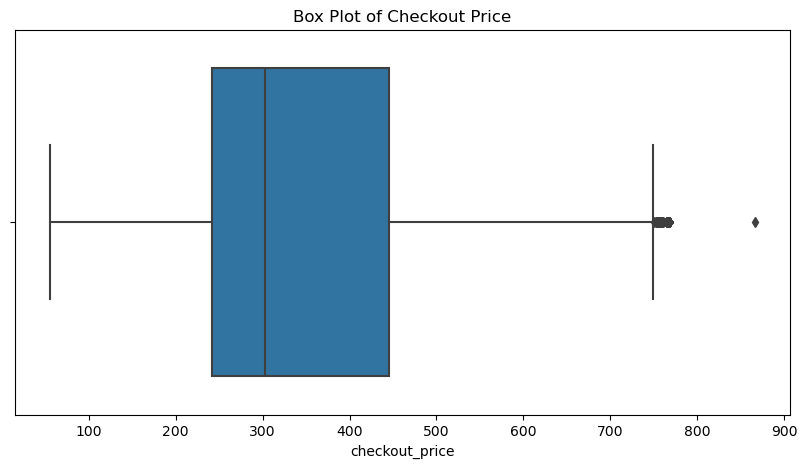

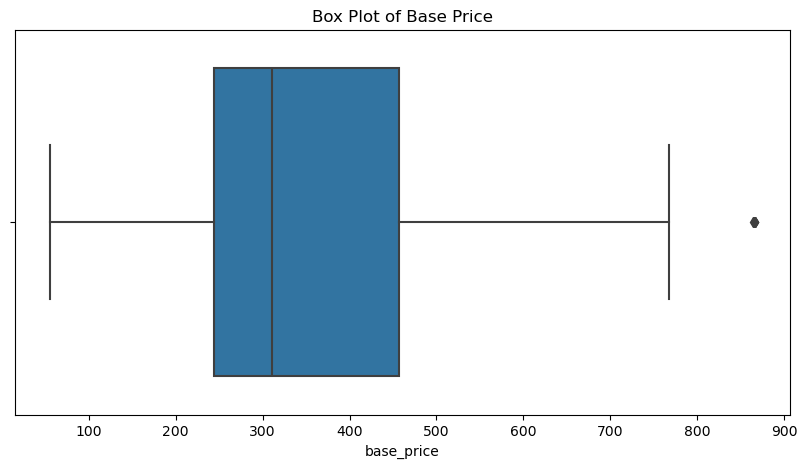

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=diff['checkout_price'])
plt.title('Box Plot of Checkout Price')
plt.show()

# Box plot for base_price
plt.figure(figsize=(10, 5))
sns.boxplot(x=diff['base_price'])
plt.title('Box Plot of Base Price')
plt.show()


/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



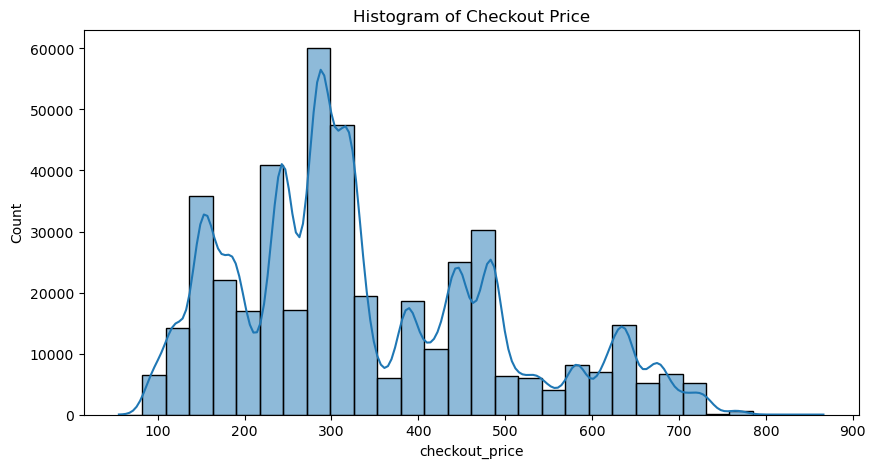

/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



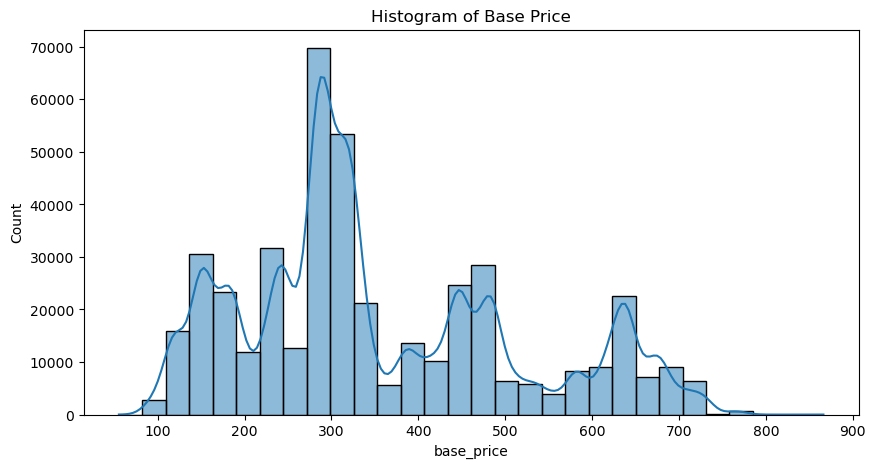

In [51]:
# Histogram for checkout_price
plt.figure(figsize=(10, 5))
sns.histplot(diff['checkout_price'], bins=30, kde=True)
plt.title('Histogram of Checkout Price')
plt.show()

# Histogram for base_price
plt.figure(figsize=(10, 5))
sns.histplot(diff['base_price'], bins=30, kde=True)
plt.title('Histogram of Base Price')
plt.show()

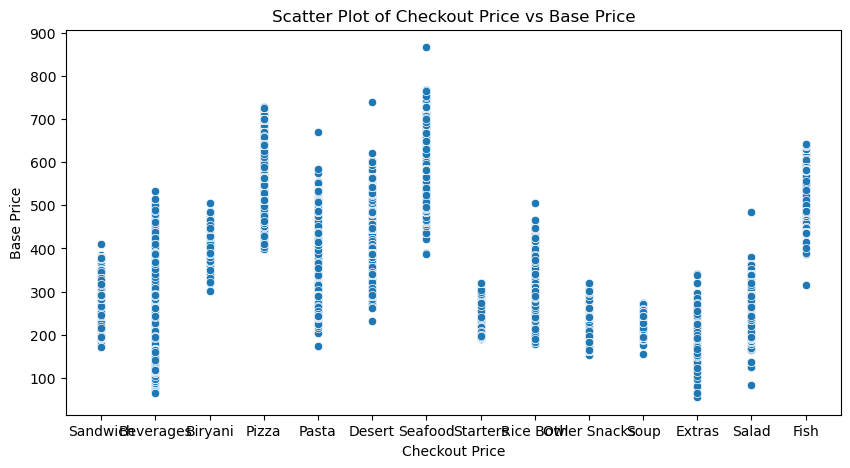

In [53]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=diff['category'], y=diff['checkout_price'])
plt.title('Scatter Plot of Checkout Price vs Base Price')
plt.xlabel('Checkout Price')
plt.ylabel('Base Price')
plt.show()

In [46]:
df.groupby('region_code')['num_orders'].sum()


region_code
23     1609906
34    24051733
35      691044
56    60520191
71     2103282
77    20529653
85     8685386
93     1366290
Name: num_orders, dtype: int64

In [47]:

region_orders = df.groupby('region_code')['num_orders'].sum()


total_orders = region_orders.sum()

percentage_orders = (region_orders / total_orders) * 100
percentage_orders

region_code
23     1.346554
34    20.117296
35     0.578001
56    50.620161
71     1.759222
77    17.171366
85     7.264611
93     1.142789
Name: num_orders, dtype: float64

In [55]:
df['center_id'].unique()

array([ 93,  83,  67,  17, 139, 124,  88, 162,  53, 149,  11,  72,  76,
       145,  80,  73,  27, 161,  14,  86,  55,  51,  91, 137,  50, 108,
        42,  68,  43,  29,  57,  94, 157, 113,  74, 152,  89, 186, 177,
        59,  24, 109,  65,  99,  58,  32,  41,  77, 106,  64, 102,  75,
        39,  13, 174,  26, 129, 110, 146,  52, 126,  97,  20, 153,  81,
        66, 143, 104,  92,  36,  23,  61, 101, 132,  10,  34,  30])

In [ ]:
center_data={}

In [66]:
unique_op_area_per_center = df.groupby('center_id')['op_area'].unique()

# Convert the result to DataFrame
unique_op_area_df = unique_op_area_per_center.reset_index()
unique_op_area_df.columns = ['center_id', 'unique_op_area']
pd.set_option('display.max_rows', None) 
unique_op_area_df

,center_id,unique_op_area
0,10,[6.3]
1,11,[3.7]
2,13,[6.7]
3,14,[2.7]
4,17,[3.2]
5,20,[4.0]
6,23,[3.4]
7,24,[3.6]
8,26,[3.0]
9,27,[4.5]


In [57]:
unique_city_code_per_center = df.groupby('center_id')['city_code'].unique()

# Convert the result to DataFrame
unique_city_code_df = unique_city_code_per_center.reset_index()
unique_city_code_df.columns = ['center_id', 'unique_city_code']
pd.set_option('display.max_rows', None) 
unique_city_code_df

,center_id,unique_city_code
0,10,[590]
1,11,[679]
2,13,[590]
3,14,[654]
4,17,[517]
5,20,[522]
6,23,[698]
7,24,[614]
8,26,[515]
9,27,[713]


In [58]:
unique_center_type_per_center = df.groupby('center_id')['center_type'].unique()

# Convert the result to DataFrame
unique_center_type_df = unique_center_type_per_center.reset_index()
unique_center_type_df.columns = ['center_id', 'unique_center_type']
pd.set_option('display.max_rows', None) 
unique_center_type_df

,center_id,unique_center_type
0,10,[TYPE_B]
1,11,[TYPE_A]
2,13,[TYPE_B]
3,14,[TYPE_C]
4,17,[TYPE_A]
5,20,[TYPE_A]
6,23,[TYPE_A]
7,24,[TYPE_B]
8,26,[TYPE_C]
9,27,[TYPE_A]


In [59]:
unique_region_code_per_center = df.groupby('center_id')['region_code'].unique()

# Convert the result to DataFrame
unique_region_code_df = unique_region_code_per_center.reset_index()
unique_region_code_df.columns = ['center_id', 'unique_region_code']
pd.set_option('display.max_rows', None) 
unique_region_code_df

,center_id,unique_region_code
0,10,[56]
1,11,[56]
2,13,[56]
3,14,[56]
4,17,[56]
5,20,[56]
6,23,[23]
7,24,[85]
8,26,[77]
9,27,[85]


In [67]:
merged_df = pd.merge(unique_op_area_df, unique_city_code_df, on='center_id')
merged_df = pd.merge(merged_df, unique_center_type_df, on='center_id')
merged_df = pd.merge(merged_df, unique_region_code_df, on='center_id')

center_data = merged_df.set_index('center_id').T.to_dict('dict')


center_data = {k: {'center_type': v['unique_center_type'], 
                    'city_code': v['unique_city_code'], 
                    'region_code': v['unique_region_code'], 
                    'op_area': v['unique_op_area']} 
               for k, v in center_data.items()}


In [70]:
def convert_arrays_to_lists(data_dict):
    # Create a new dictionary to store the converted values
    converted_dict = {}
    
    for key, value in data_dict.items():
        converted_dict[key] = {k: v.tolist() for k, v in value.items()}
    
    return converted_dict

In [71]:
convert_arrays_to_lists(center_data)

{10: {'center_type': ['TYPE_B'],
  'city_code': [590],
  'region_code': [56],
  'op_area': [6.3]},
 11: {'center_type': ['TYPE_A'],
  'city_code': [679],
  'region_code': [56],
  'op_area': [3.7]},
 13: {'center_type': ['TYPE_B'],
  'city_code': [590],
  'region_code': [56],
  'op_area': [6.7]},
 14: {'center_type': ['TYPE_C'],
  'city_code': [654],
  'region_code': [56],
  'op_area': [2.7]},
 17: {'center_type': ['TYPE_A'],
  'city_code': [517],
  'region_code': [56],
  'op_area': [3.2]},
 20: {'center_type': ['TYPE_A'],
  'city_code': [522],
  'region_code': [56],
  'op_area': [4.0]},
 23: {'center_type': ['TYPE_A'],
  'city_code': [698],
  'region_code': [23],
  'op_area': [3.4]},
 24: {'center_type': ['TYPE_B'],
  'city_code': [614],
  'region_code': [85],
  'op_area': [3.6]},
 26: {'center_type': ['TYPE_C'],
  'city_code': [515],
  'region_code': [77],
  'op_area': [3.0]},
 27: {'center_type': ['TYPE_A'],
  'city_code': [713],
  'region_code': [85],
  'op_area': [4.5]},
 29: {'cen

In [52]:
unique_op_area_per_center = df.groupby('meal_id')['category'].unique()

# Convert the result to DataFrame
unique_op_area_df = unique_op_area_per_center.reset_index()
unique_op_area_df.columns = ['meal_id', 'category']
pd.set_option('display.max_rows', None) 
unique_op_area_df

,meal_id,category
0,1062,[Beverages]
1,1109,[Rice Bowl]
2,1198,[Extras]
3,1207,[Beverages]
4,1216,[Pasta]
5,1230,[Beverages]
6,1247,[Biryani]
7,1248,[Beverages]
8,1311,[Extras]
9,1438,[Soup]


In [53]:
unique_op_area_per_center = df.groupby('meal_id')['cuisine'].unique()

# Convert the result to DataFrame
unique_op_area_df = unique_op_area_per_center.reset_index()
unique_op_area_df.columns = ['meal_id', 'cuisine']
pd.set_option('display.max_rows', None) 
unique_op_area_df

,meal_id,cuisine
0,1062,[Italian]
1,1109,[Indian]
2,1198,[Thai]
3,1207,[Continental]
4,1216,[Italian]
5,1230,[Continental]
6,1247,[Indian]
7,1248,[Indian]
8,1311,[Thai]
9,1438,[Thai]


In [6]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [79]:
df.describe(percentiles=[.05, .1, .9, .95])


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_x,region_code_x,op_area_x,city_code_y,region_code_y,op_area_y
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,456.000000,23.000000,0.900000
5%,1.025009e+06,8.000000,14.000000,1198.000000,121.280000,144.530000,0.000000,0.00000,14.000000,478.000000,34.000000,2.700000,478.000000,34.000000,2.700000
10%,1.049949e+06,16.000000,23.000000,1216.000000,151.380000,155.260000,0.000000,0.00000,26.000000,517.000000,34.000000,2.800000,517.000000,34.000000,2.800000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,596.000000,56.000000,4.000000
90%,1.450094e+06,132.000000,152.000000,2704.000000,581.030000,630.530000,0.000000,1.00000,609.000000,695.000000,77.000000,5.300000,695.000000,77.000000,5.300000
95%,1.475046e+06,139.000000,161.000000,2760.000000,640.230000,668.330000,1.000000,1.00000,878.000000,700.000000,85.000000,6.700000,700.000000,85.000000,6.700000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,713.000000,93.000000,7.000000


In [7]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 213354 to 247830
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [8]:
df.drop('id',axis=1,inplace=True)

In [11]:
df['checkout_price']=df['checkout_price'].astype(int)

In [12]:
df['base_price']=df['base_price'].astype(int)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 213354 to 247830
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  int64  
 4   base_price             456548 non-null  int64  
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   city_code              456548 non-null  int64  
 9   region_code            456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
dtypes: float64(1), int64(10), object(3)


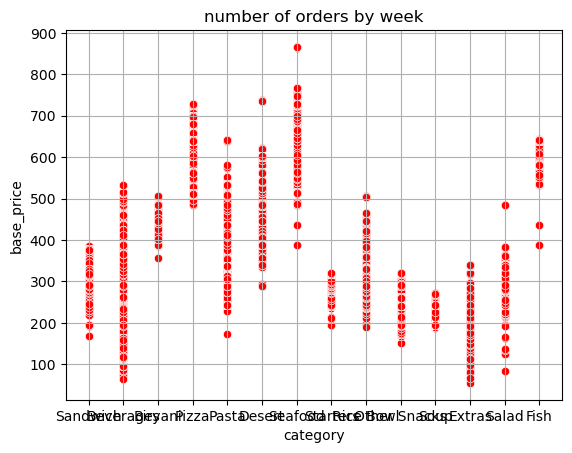

In [101]:
sns.scatterplot(x=df['category'], y=df['base_price'], color='r')
plt.grid(True)
plt.title('number of orders by week')
plt.show()

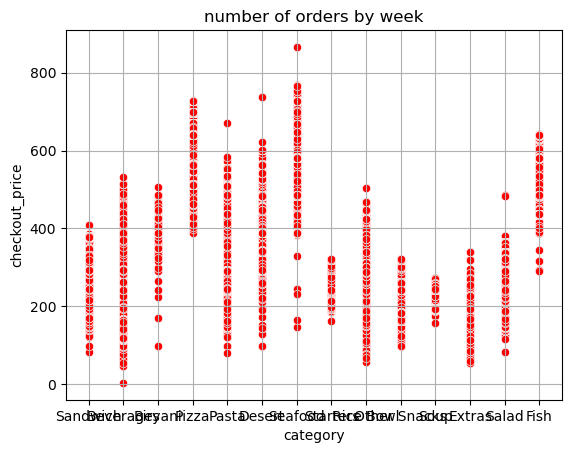

In [19]:
sns.scatterplot(x=df['category'], y=df['checkout_price'], color='r')
plt.grid(True)
plt.title('number of orders by week')
plt.show()

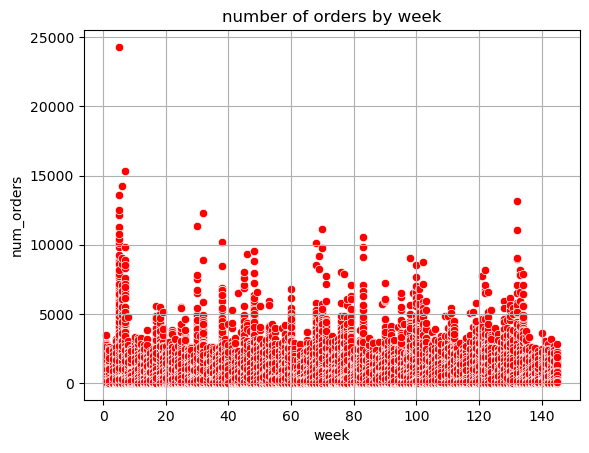

In [102]:
sns.scatterplot(x=df['week'], y=df['num_orders'], color='r')
plt.grid(True)
plt.title('number of orders by week')
plt.show()

#### from scatter plot we can consider the above 5000 number of orders become outliers

In [13]:
# Compute 5th and 95th percentiles for each category
percentiles = df.groupby('category').agg(
    checkout_price_5th=('checkout_price', lambda x: x.quantile(0.05)),
    checkout_price_95th=('checkout_price', lambda x: x.quantile(0.95)),
    base_price_5th=('base_price', lambda x: x.quantile(0.05)),
    base_price_95th=('base_price', lambda x: x.quantile(0.95))
)

# Count values above the 90th percentile and below the 10th percentile for each category
counts = df.groupby('category').apply(
    lambda x: pd.Series({
        'count_above_95th_cp': (x['checkout_price'] > percentiles.loc[x.name, 'checkout_price_95th']).sum(),
        'count_below_5th_cp': (x['checkout_price'] < percentiles.loc[x.name, 'checkout_price_5th']).sum(),
        'count_above_95th_bp': (x['base_price'] > percentiles.loc[x.name, 'base_price_95th']).sum(),
        'count_below_5th_bp': (x['base_price'] < percentiles.loc[x.name, 'base_price_5th']).sum()
    })
)

print(percentiles)
print(counts)


              checkout_price_5th  checkout_price_95th  base_price_5th  \
category                                                                
Beverages                   97.0                389.0           117.0   
Biryani                    387.0                486.0           418.0   
Desert                     293.0                514.0           388.0   
Extras                     129.0                223.0           161.0   
Fish                       437.0                631.0           581.0   
Other Snacks               195.0                319.0           231.0   
Pasta                      242.0                533.0           336.0   
Pizza                      438.0                680.0           549.0   
Rice Bowl                  207.0                447.0           257.0   
Salad                      205.0                338.0           243.0   
Sandwich                   196.0                329.0           273.0   
Seafood                    436.0                728

In [14]:
filtered_df = df.copy()

# Apply filters to remove outliers
filtered_df = filtered_df[
    (filtered_df['checkout_price'] >= filtered_df['category'].map(percentiles['checkout_price_5th'])) &
    (filtered_df['checkout_price'] <= filtered_df['category'].map(percentiles['checkout_price_95th'])) &
    (filtered_df['base_price'] >= filtered_df['category'].map(percentiles['base_price_5th'])) &
    (filtered_df['base_price'] <= filtered_df['category'].map(percentiles['base_price_95th']))
]

In [17]:
filtered_df=filtered_df[filtered_df['num_orders']<5000]

In [18]:
filtered_df.shape

(395577, 14)

In [107]:
label_encoder = LabelEncoder()


In [108]:
df["center_type"] = label_encoder.fit_transform(df["center_type"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df["category"] = label_encoder.fit_transform(df["category"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df["cuisine"] = label_encoder.fit_transform(df["cuisine"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'TYPE_A': 0, 'TYPE_B': 1, 'TYPE_C': 2}
{'Beverages': 0, 'Biryani': 1, 'Desert': 2, 'Extras': 3, 'Fish': 4, 'Other Snacks': 5, 'Pasta': 6, 'Pizza': 7, 'Rice Bowl': 8, 'Salad': 9, 'Sandwich': 10, 'Seafood': 11, 'Soup': 12, 'Starters': 13}
{'Continental': 0, 'Indian': 1, 'Italian': 2, 'Thai': 3}


In [19]:
filtered_df["center_type"] = label_encoder.fit_transform(filtered_df["center_type"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df["category"] = label_encoder.fit_transform(filtered_df["category"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

filtered_df["cuisine"] = label_encoder.fit_transform(filtered_df["cuisine"])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'TYPE_A': 0, 'TYPE_B': 1, 'TYPE_C': 2}
{'Beverages': 0, 'Biryani': 1, 'Desert': 2, 'Extras': 3, 'Fish': 4, 'Other Snacks': 5, 'Pasta': 6, 'Pizza': 7, 'Rice Bowl': 8, 'Salad': 9, 'Sandwich': 10, 'Seafood': 11, 'Soup': 12, 'Starters': 13}
{'Continental': 0, 'Indian': 1, 'Italian': 2, 'Thai': 3}


In [20]:
filtered_df.shape

(395577, 14)

In [24]:
filtered_df.set_index('week',inplace=True,drop=False)

In [25]:
filtered_df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
week,,,,,,,,,,,,,,
1,1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2
1,1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1
1,1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1
1,1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1
1,1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0


In [26]:
filtered_df.tail()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
week,,,,,,,,,,,,,,
145,145,24,1885,159,159,0,0,1890,614,85,1,3.6,0,3
145,145,83,1247,447,445,0,0,28,659,77,0,5.3,1,1
145,145,68,2104,582,581,0,0,40,676,34,1,4.1,4,0
145,145,59,1558,563,563,0,0,67,456,56,0,4.2,7,0
145,145,76,1558,563,562,0,0,95,614,85,0,3.0,7,0


In [27]:
X=filtered_df.drop('num_orders',axis=1)
y=filtered_df['num_orders']

In [28]:
len(X.loc[:118])

322382

In [29]:
len(y.loc[:118])

322382

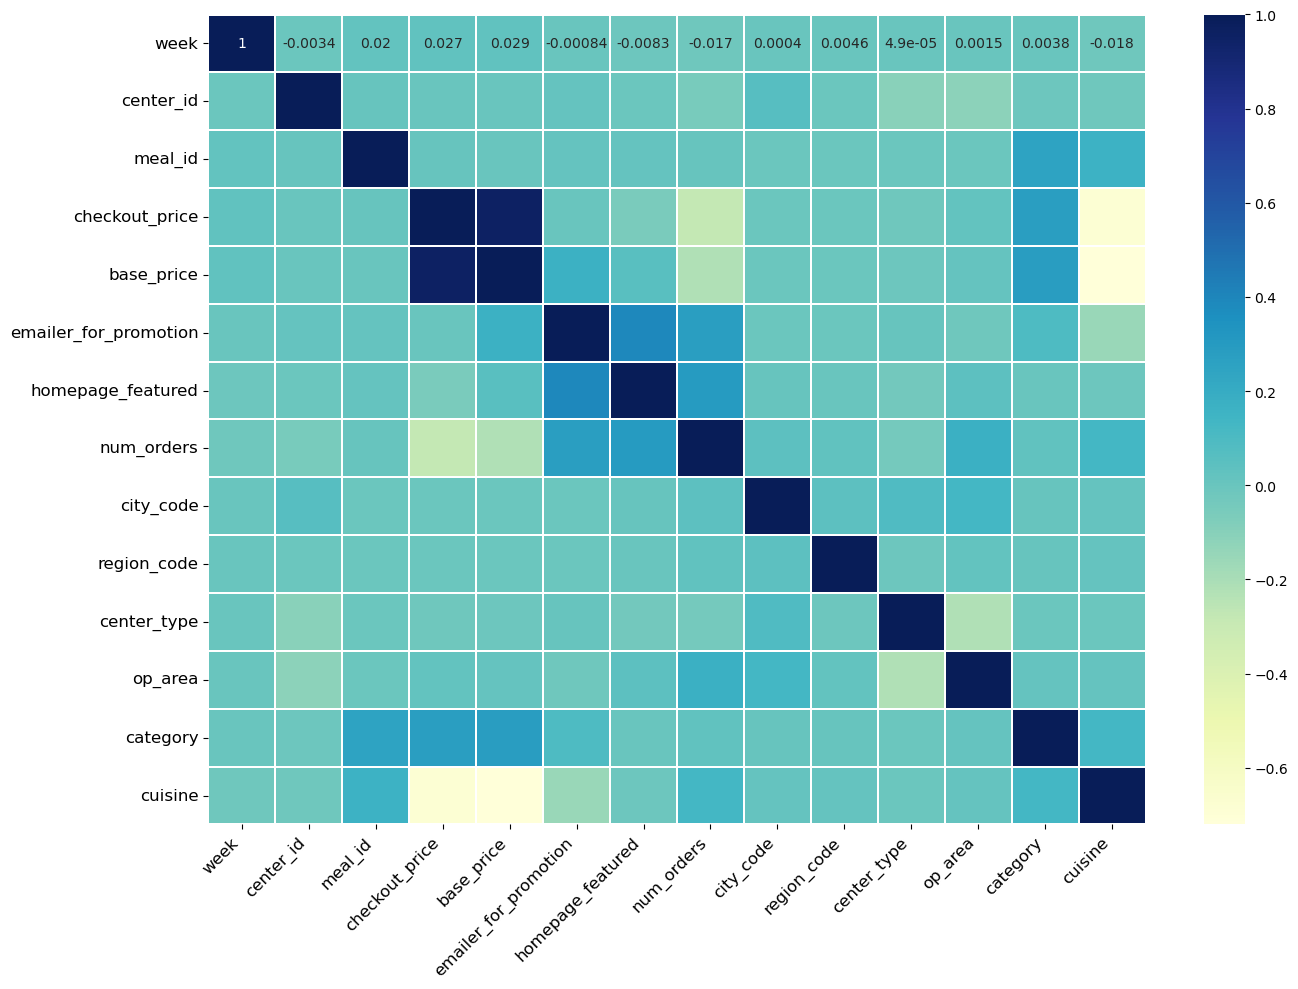

In [51]:
plt.figure(figsize = (14, 10))

# Plot labels
sns.heatmap(df.corr(),linewidths=0.1, cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [34]:
### checkoutprice ,base_price , email_promotion,homepage promotion,op_area,cuisin have high correlation with target column.

In [4]:
pip install scikit-learn==1.3.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
gb_model=joblib.load('Model/gb_model.pkl')